In [2]:
#Importing requried libraries
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 100)

#Visalization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Alogirthms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

#Pre-processing libraires
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler

#Warnings 
import warnings
warnings.filterwarnings('ignore')

#Hyperparamter tunning 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [3]:
df = pd.read_csv('data.csv') 

In [4]:
df.head() #returns Top 5 records 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape #Return rows and columns

(1338, 7)

In [6]:
df.info() #To know Datatype and count of rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum() # Checking NULL values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe() #Summary of statistical information

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.quantile([.20,0.40,0.60,0.80,0.85,0.90,0.95,0.97,0.98,0.99])

,age,bmi,children,charges
0.20,24.0,25.3260,0.0,3991.575720
0.40,34.0,28.7970,0.0,7369.052730
0.60,44.0,32.0320,1.0,11399.857160
0.80,54.0,35.8600,2.0,20260.626406
0.85,56.0,37.0500,2.0,24990.166996
0.90,59.0,38.6195,3.0,34831.719700
0.95,62.0,41.1060,3.0,41181.827787
0.97,63.0,42.4534,4.0,44492.862728
0.98,63.0,43.9186,4.0,46676.189821
0.99,64.0,46.4079,5.0,48537.480726


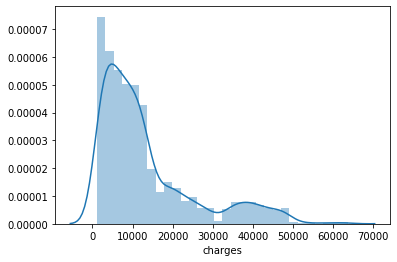

In [10]:
sns.distplot(df['charges']) # Histogram
plt.show()

In [11]:
df = df[(df['charges']<=45000)]

In [12]:
print('Duplicate values:',df.duplicated().sum()) # checking Duplicates

Duplicate values: 1


In [13]:
df.drop_duplicates(inplace = True) #Droping the Duplicates

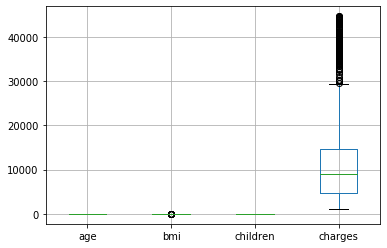

In [14]:
df.boxplot()# checking data is Skew or not
plt.show()

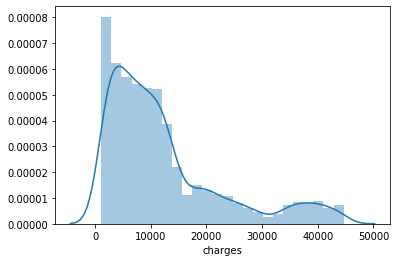

In [15]:
sns.distplot(df['charges']) # Histogram
plt.show()

## Step 3: Visualizing the data


In [16]:
categorical = df.select_dtypes(include = 'object').columns
for i in categorical:
    print(i)

sex
smoker
region


#### Univariate Analysis

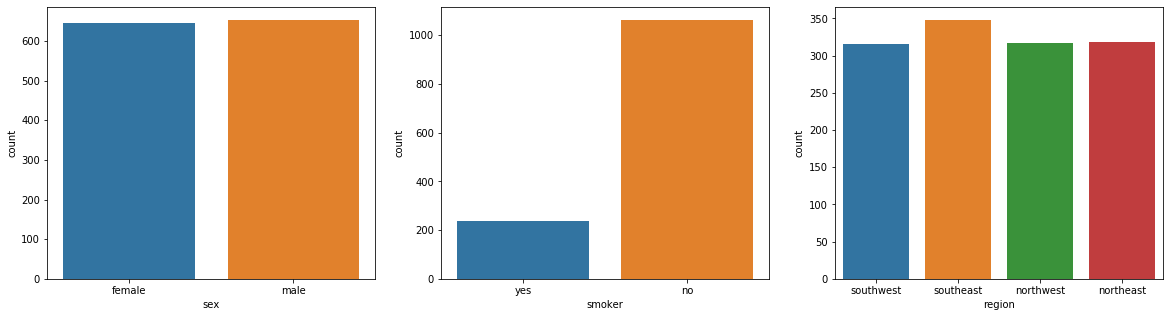

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
sns.countplot(x = 'sex', data = df, ax = ax[0])
sns.countplot(x = 'smoker', data = df, ax = ax[1])
sns.countplot(x = 'region', data = df, ax = ax[2])
plt.show()

In [18]:
numeric = df.select_dtypes(include = np.number).columns
for i in numeric:
    print(i)

age
bmi
children
charges


In [1]:
fig, ax = plt.subplots(nrows = 2 ,ncols = 2,figsize = (12,8))
sns.distplot(df['age'], bins = 10, ax = ax[0,0])
sns.distplot(df['bmi'], bins = 10, ax = ax[0,1])
sns.distplot(df['children'], bins = 10, ax = ax[1,0])
sns.distplot(df['charges'], bins = 10, ax = ax[1,1])
plt.show()

NameError: name 'plt' is not defined

## Bivariate Analysis

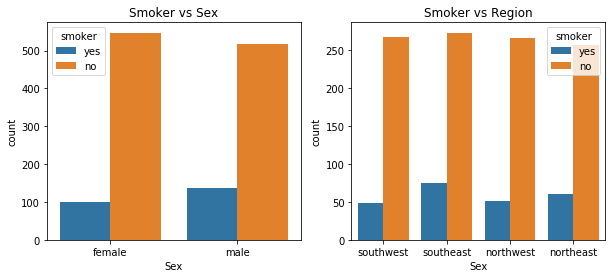

In [20]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
sns.countplot(x = df.sex, hue= df.smoker,ax = ax[0]).set(xlabel='Sex', title='Smoker vs Sex')
sns.countplot(x = df.region, hue= df.smoker,ax = ax[1]).set(xlabel='Sex', title='Smoker vs Region')
plt.show()

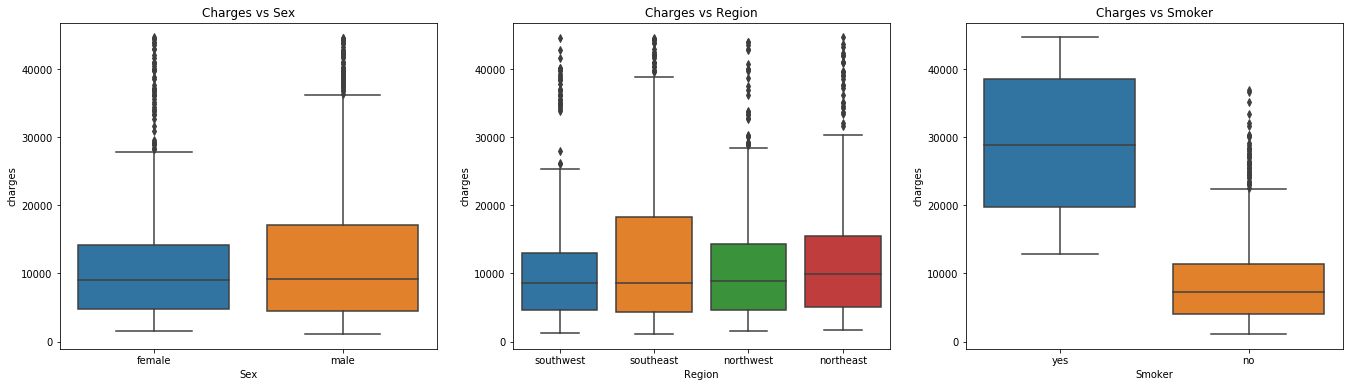

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (23,6))
sns.boxplot(x = df.sex, y = df.charges,ax = ax[0]).set(xlabel='Sex', title='Charges vs Sex')
sns.boxplot(x = df.region, y = df.charges,ax = ax[1]).set(xlabel='Region', title='Charges vs Region')
sns.boxplot(x = df.smoker, y = df.charges,ax = ax[2]).set(xlabel='Smoker', title='Charges vs Smoker')
plt.show()

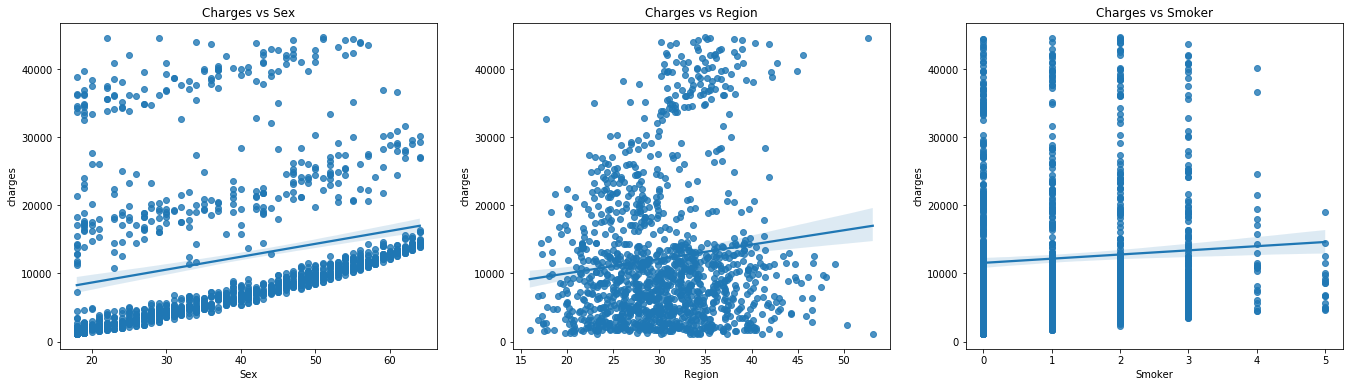

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (23,6))
sns.regplot(x = df.age, y = df.charges,ax = ax[0]).set(xlabel='Sex', title='Charges vs Sex')
sns.regplot(x = df.bmi, y = df.charges,ax = ax[1]).set(xlabel='Region', title='Charges vs Region')
sns.regplot(x = df.children, y = df.charges,ax = ax[2]).set(xlabel='Smoker', title='Charges vs Smoker')
plt.show()

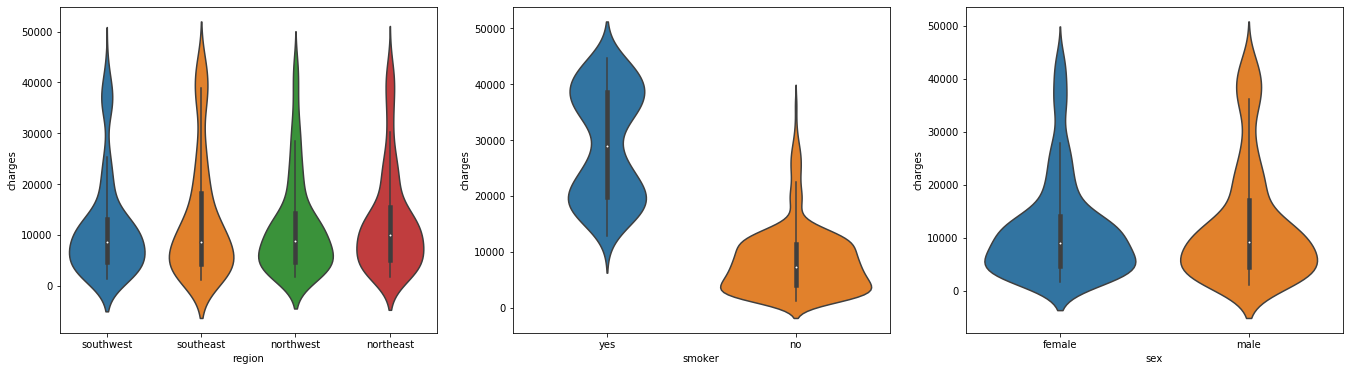

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (23,6))
sns.violinplot(x='region', y='charges',data=df,ax = ax[0])
sns.violinplot(x='smoker', y='charges',data=df,ax = ax[1])
sns.violinplot(x='sex', y='charges',data=df,ax = ax[2])
plt.show()

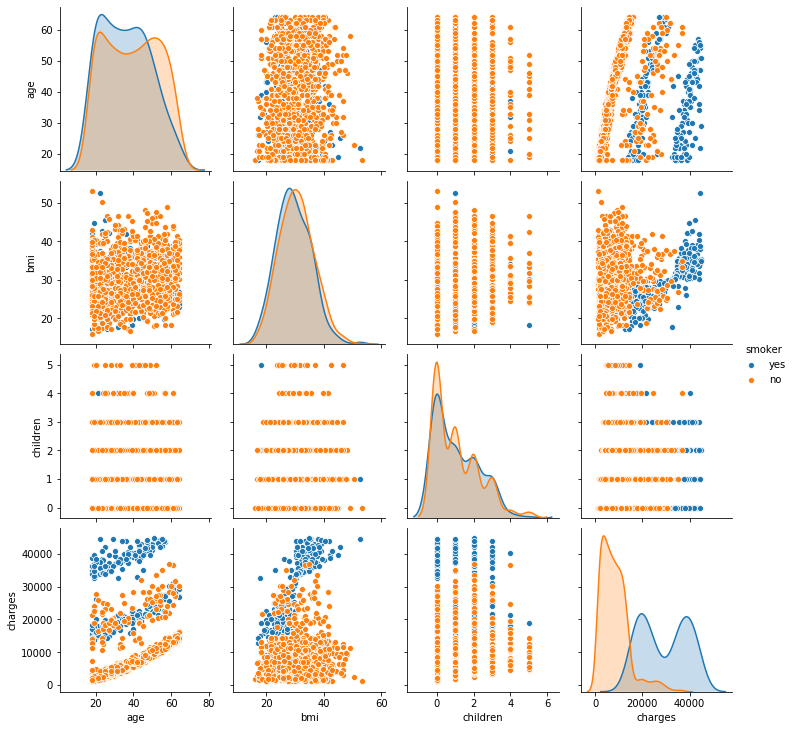

In [23]:
sns.pairplot(df, hue = 'smoker')
plt.show()

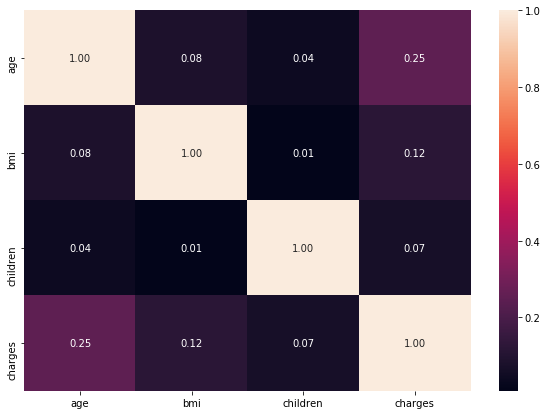

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot = True, fmt='.2f')
plt.show()

In [25]:
df2 = pd.get_dummies(df, columns=['region','sex','smoker'],drop_first=True)

In [26]:
df2.head()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [27]:
X = df2.drop(['charges','sex_male','region_northwest','region_southeast','region_southwest'], axis = 1)
y = df2['charges']

In [28]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 101)

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns)
feat_importances

,0
age,0.156229
bmi,0.233970
children,0.028517
smoker_yes,0.581284


In [30]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [31]:
ols = build_model(X,y)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     787.6
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:16:44   Log-Likelihood:                -13076.
No. Observations:                1299   AIC:                         2.616e+04
Df Residuals:                    1294   BIC:                         2.619e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9262.3213    920.940    -10.057      0.0

In [32]:
checkVIF(X)

,Features,VIF
1,bmi,7.90
0,age,7.38
2,children,1.79
3,smoker_yes,1.20


### Model 1 - Linear regression without scaling

In [33]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print('Accuracy: ',r2_score(y_train,y_train_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print() 
print('Accuracy: ',r2_score(y_test,y_test_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy:  0.7025979341291707
RMSE:  5712.119683314294

Accuracy:  0.7208708012575019
RMSE:  5669.999455516971


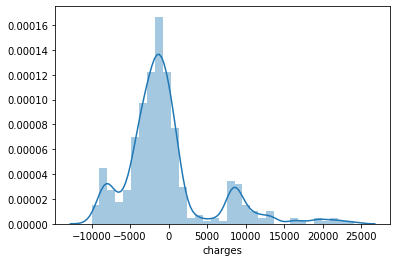

In [36]:
sns.distplot(y_test-y_test_pred)
plt.show()

In [38]:
#cross validation
scores_accuracy = cross_val_score(reg, X, y, cv=10, scoring='r2',n_jobs=-1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 70.330


In [39]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_scaled = scaler.fit_transform(X)

## Model 2 - Linear regression with scaling

In [40]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)

print('Accuracy: ',r2_score(y_train,y_train_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print() 
print('Accuracy: ',r2_score(y_test,y_test_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy:  0.7025979341291707
RMSE:  5712.119683314294

Accuracy:  0.7148016104238859
RMSE:  5731.310231997713


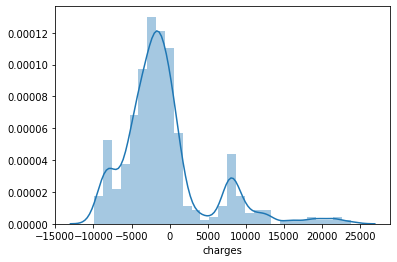

In [41]:
sns.distplot(y_test-y_test_pred)
plt.show()

In [42]:
#cross validation
scores_accuracy = cross_val_score(reg, X_scaled, y, cv=10, scoring='r2',n_jobs=-1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 70.330


In [43]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print('Accuracy: ',r2_score(y_train,y_train_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print() 
print('Accuracy: ',r2_score(y_test,y_test_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy:  0.9999964210337581
RMSE:  19.81545773472123

Accuracy:  0.7188374924249066
RMSE:  5690.613459238199


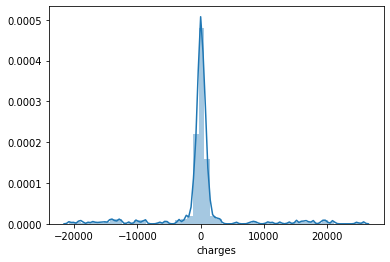

In [44]:
sns.distplot(y_test-y_test_pred)
plt.show()

In [45]:
#cross validation
scores_accuracy = cross_val_score(dt, X, y, cv=10, scoring='r2',n_jobs = -1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 63.930


In [89]:
max_depths = [int(x) for x in np.linspace(1, 32, num = 32)]
min_samples_leafs = [int(x) for x in np.linspace(1, 5, num = 5)]
min_samples_splits = [int(x) for x in np.linspace(1, 10, num = 10)]
criterions = ['mse','friedman_mse', 'mae']
splitters =  ['best','random']
max_features = ['auto','sqrt','log2']
# Create the random grid
random_grid = {
             'criterion':criterions,
               'splitter':splitters,
            'max_depth':max_depths,
              'min_samples_leaf':min_samples_leafs,
              'min_samples_split':min_samples_splits,
                 'max_features': max_features
 }

print(random_grid)

regressor = DecisionTreeRegressor()

dt = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='r2', n_iter =20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

dt.fit(X_train,y_train)
dt.best_params_

{'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best', 'random'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': ['auto', 'sqrt', 'log2']}
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished


{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'mae'}

In [46]:
dt = DecisionTreeRegressor(criterion ='mae',max_depth =10,min_samples_leaf=4,min_samples_split=2,splitter='best' )
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print('Accuracy: ',r2_score(y_train,y_train_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print() 
print('Accuracy: ',r2_score(y_test,y_test_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy:  0.8348583978201467
RMSE:  4256.508988300211

Accuracy:  0.8102111118208661
RMSE:  4675.367714768702


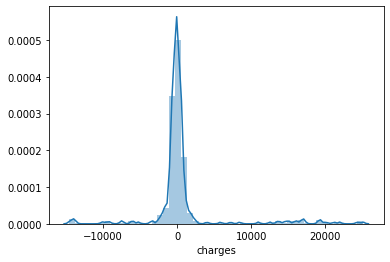

In [47]:
sns.distplot(y_test-y_test_pred)
plt.show()

In [48]:
#cross validation
scores_accuracy = cross_val_score(dt, X, y, cv=10, scoring='r2',n_jobs=-1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 78.500


In [49]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('Accuracy: ',r2_score(y_train,y_train_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print() 
print('Accuracy: ',r2_score(y_test,y_test_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy:  0.9703021766763967
RMSE:  1805.0432716961927

Accuracy:  0.8028339879760851
RMSE:  4765.3676128199595


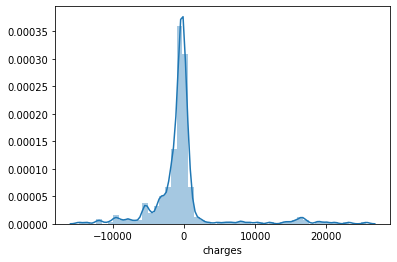

In [50]:
sns.distplot(y_test-y_test_pred)
plt.show()

In [51]:
#cross validation
scores_accuracy = cross_val_score(rf, X, y, cv=10, scoring='r2',n_jobs=-1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 77.800


In [94]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 40, num = 10)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



regressor=RandomForestRegressor()


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='r2', n_iter =20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf.fit(X_train,y_train)

rf.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.3min finished


{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5,
 'bootstrap': True}

In [52]:
rf = RandomForestRegressor(n_estimators = 1100,min_samples_split=2,min_samples_leaf=4,max_features='auto',max_depth = 5,bootstrap=True)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('Accuracy: ',r2_score(y_train,y_train_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print() 
print('Accuracy: ',r2_score(y_test,y_test_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy:  0.8494517235211249
RMSE:  4064.088923859358

Accuracy:  0.8454715204287704
RMSE:  4218.758337787977


In [54]:
#cross validation
scores_accuracy = cross_val_score(rf, X, y, cv=10, scoring='r2',n_jobs = -1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 81.989


In [247]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
learning_rate = ['0.05','0.1', '0.2','0.5','0.6','0.01']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
subsample=[0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)



regressor=XGBRegressor()


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = GridSearchCV(estimator = regressor, param_grid = random_grid,scoring='r2', cv = 2, verbose=2, n_jobs = -1)

xg_random.fit(X_train,y_train)
print(xg_random.best_params_)

y_train_pred = xg_random.predict(X_train)
y_test_pred = xg_random.predict(X_test)

print('Accuracy: ',r2_score(y_train,y_train_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print() 
print('Accuracy: ',r2_score(y_test,y_test_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

#cross validation
# scores_accuracy = cross_val_score(xg_random, X, y, cv=10, scoring='r2')
# print('K-fold cross-validation results:')
# print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'learning_rate': ['0.05', '0.1', '0.2', '0.5', '0.6', '0.01'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}
Fitting 2 folds for each of 5400 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

{'learning_rate': '0.01', 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 400, 'subsample': 0.6}
Accuracy:  0.9043850493404648
RMSE:  3775.5244959769648

Accuracy:  0.8355656700386265
RMSE:  4800.340628924042


In [246]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 40, num = 5)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



regressor=RandomForestRegressor()


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf = GridSearchCV(estimator = regressor, param_grid = random_grid,scoring='r2',cv=2, verbose=2, n_jobs = -1)

rf.fit(X_train,y_train)

print(rf.best_params_)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('Accuracy: ',r2_score(y_train,y_train_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print() 
print('Accuracy: ',r2_score(y_test,y_test_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

#cross validation
# scores_accuracy = cross_val_score(rf, X, y, cv=10, scoring='r2')
# print('K-fold cross-validation results:')
# print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

Fitting 2 folds for each of 2160 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 37.7min finished


{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy:  0.8916238672046004
RMSE:  4019.584979776203

Accuracy:  0.8423227075299174
RMSE:  4700.676738723406


In [101]:
max_depths = [int(x) for x in np.linspace(1, 32, num = 32)]
min_samples_leafs = [int(x) for x in np.linspace(1, 5, num = 5)]
min_samples_splits = [int(x) for x in np.linspace(1, 10, num = 10)]
criterions = ['mse','friedman_mse', 'mae']
splitters =  ['best','random']
max_features = ['auto','sqrt','log2']
# Create the random grid
random_grid = {
             'criterion':criterions,
               'splitter':splitters,
            'max_depth':max_depths,
              'min_samples_leaf':min_samples_leafs,
              'min_samples_split':min_samples_splits,
                 'max_features': max_features
 }

print(random_grid)

regressor = DecisionTreeRegressor()

dt = GridSearchCV(estimator = regressor, param_grid = random_grid,scoring='r2', cv = 3, verbose=2, n_jobs = -1)

dt.fit(X_train,y_train)
print(dt.best_params_)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print('Accuracy: ',r2_score(y_train,y_train_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print() 
print('Accuracy: ',r2_score(y_test,y_test_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

{'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best', 'random'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': ['auto', 'sqrt', 'log2']}
Fitting 3 folds for each of 28800 candidates, totalling 86400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1096 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 2720 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 8648 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 15768 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 24200 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 33912 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 44936 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 57240 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 70856 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 85752 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 86400 out of 86400 | elapsed:  7.9min finished


{'criterion': 'friedman_mse', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 7, 'splitter': 'random'}
Accuracy:  0.8619573356124057
RMSE:  4536.501473525885

Accuracy:  0.8155536494292804
RMSE:  5084.062052372483


### GridSearchCV

In [100]:
#cross validation
scores_accuracy = cross_val_score(xgb, X, y, cv=10, scoring='r2')
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 81.799


In [99]:
xgb = XGBRegressor(n_estimators=900, max_depth=30,learning_rate=0.01,min_child_weight=5,subsample=0.7)
xgb.fit(X_train, y_train)
y_train_pred = xg_random.predict(X_train)
y_test_pred = xg_random.predict(X_test)

print('Accuracy: ',r2_score(y_train,y_train_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print() 
print('Accuracy: ',r2_score(y_test,y_test_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy:  0.9795546259904737
RMSE:  1745.8700688612398

Accuracy:  0.8096719495141298
RMSE:  5164.487240806761


In [98]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6','0.01']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
subsample=[0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)



regressor=XGBRegressor()


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='r2', n_iter=20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

xg_random.fit(X_train,y_train)
xg_random.best_params_

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6', '0.01'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   18.9s finished


{'subsample': 0.7,
 'n_estimators': 900,
 'min_child_weight': 5,
 'max_depth': 30,
 'learning_rate': '0.01'}

In [97]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print('Accuracy: ',r2_score(y_train,y_train_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print() 
print('Accuracy: ',r2_score(y_test,y_test_pred)) 
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Accuracy:  0.9957558869578812
RMSE:  795.440796254709

Accuracy:  0.7941698241370833
RMSE:  5370.693047807577


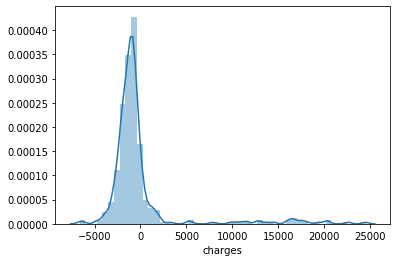

In [53]:
sns.distplot(y_test-y_test_pred)
plt.show()